c:\Users\alexi\OneDrive\VAWI\PA2\Classification\.venv\Scripts\python.exe
    Area  Major_Axis_Length  Minor_Axis_Length  Eccentricity  Convex_Area  \
0  15231         229.749878          85.093788      0.928882        15617   
1  14656         206.020065          91.730972      0.895405        15072   
2  14634         214.106781          87.768288      0.912118        14954   
3  13176         193.337387          87.448395      0.891861        13368   
4  14688         211.743378          89.312454      0.906691        15262   

     Extent   Class  
0  0.572896  Cammeo  
1  0.615436  Cammeo  
2  0.693259  Cammeo  
3  0.640669  Cammeo  
4  0.646024  Cammeo  
               Area  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
count   3810.000000        3810.000000        3810.000000   3810.000000   
mean   12667.727559         188.776222          86.313750      0.886871   
std     1732.367706          17.448679           5.729817      0.020818   
min     7551.000000         145.

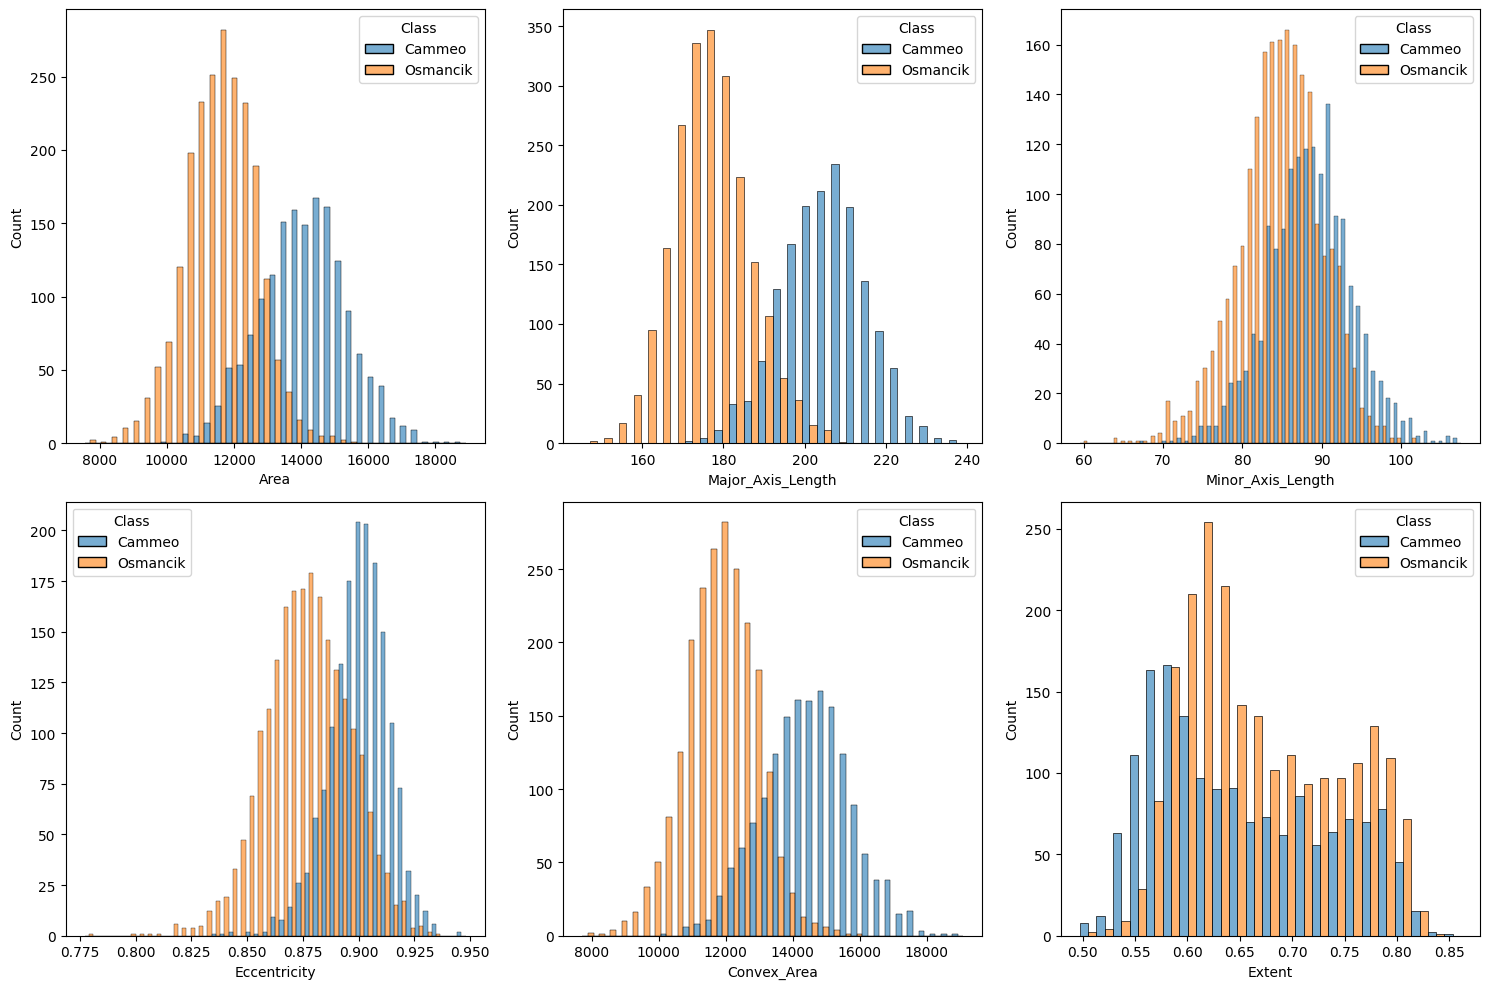

                       Area  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000           0.903015           0.787840   
Major_Axis_Length  0.903015           1.000000           0.452092   
Minor_Axis_Length  0.787840           0.452092           1.000000   
Eccentricity       0.352095           0.710897          -0.291683   
Convex_Area        0.998939           0.903381           0.787318   
Extent            -0.061184          -0.139562           0.063366   

                   Eccentricity  Convex_Area    Extent  
Area                   0.352095     0.998939 -0.061184  
Major_Axis_Length      0.710897     0.903381 -0.139562  
Minor_Axis_Length     -0.291683     0.787318  0.063366  
Eccentricity           1.000000     0.352716 -0.198580  
Convex_Area            0.352716     1.000000 -0.065826  
Extent                -0.198580    -0.065826  1.000000  


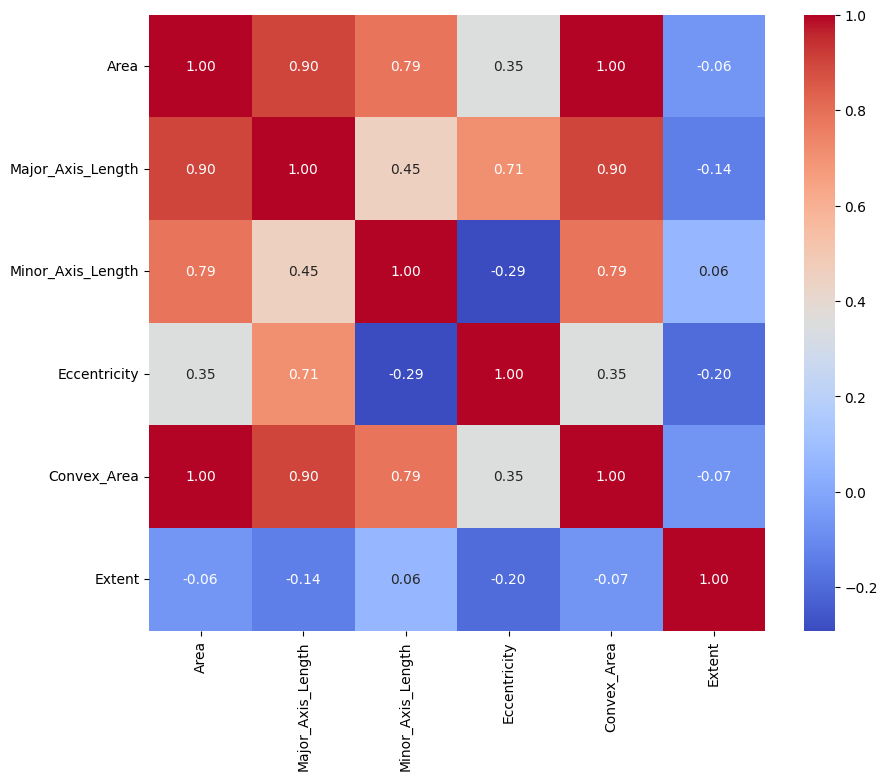

Klassenhäufigkeit: Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


C:\Users\alexi\AppData\Local\Temp\ipykernel_14216\1932231885.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='Set1')


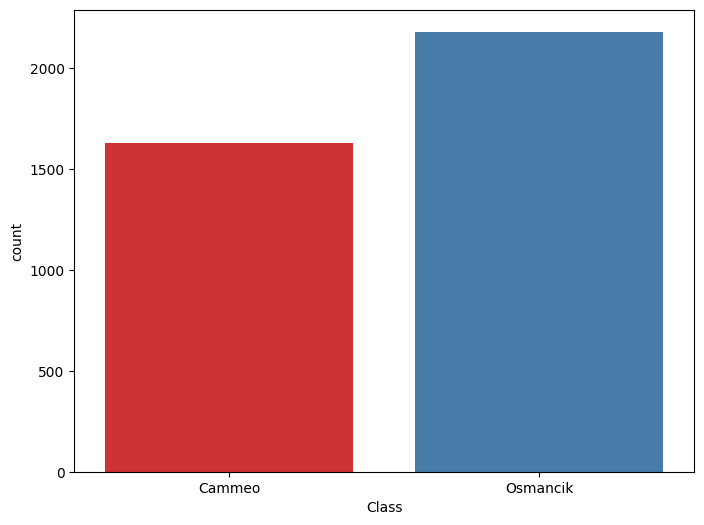

             feature         VIF
0               Area  577.169349
1  Major_Axis_Length  173.899727
2  Minor_Axis_Length  150.025242
3       Eccentricity   50.177525
4        Convex_Area  566.795396
5             Extent    1.054524


In [4]:
#from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Add this line
import math
import sys
print(sys.executable)
  
# Read CSV file
df = pd.read_csv('C:/Users/alexi/OneDrive/VAWI/PA2/Classification/data.csv')
df = df.drop('Perimeter', axis=1)

# Drop perimeter
# Data (as pandas dataframes)
X = df.drop('Class', axis=1)  # replace 'target_column' with the name of your target column
y = df['Class']  # replace 'target_column' with the name of your target column

print(df.head())

print(df.describe()) # Display the summary statistics of the dataset

# Display the information of the DataFrame
print(df.info())

# Assuming 'Class' is your categorical column
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(num_cols) / 3)

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

# Flatten the axes array
axs = axs.ravel()

for i, column in enumerate(num_cols):
    # Add an alpha of 0.6 and remove the space between the bars
    sns.histplot(data=df, x=column, hue='Class', multiple='dodge', ax=axs[i], alpha=0.6, shrink=1)

# Remove the unused subplots
for j in range(i+1, num_rows*3):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Select columns from 'Area' to 'Extent' and calculate the correlation matrix
corr_matrix = df.loc[:, 'Area':'Extent'].corr()

# Print the correlation matrix
print(corr_matrix)

# Create a correlation plot
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Show the plot
plt.show()

# Print the counts for the 'Class' column
print("Klassenhäufigkeit:", df['Class'].value_counts())

# Create a bar plot of the counts
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df, x='Class', palette='Set1')
# Show the plot
plt.show()

from sklearn.linear_model import LinearRegression

# Initialize the dataframe
vif = pd.DataFrame()

# Add the features column
vif["feature"] = X.columns

# Calculate VIF for each feature
vif["VIF"] = [1 / (1 - LinearRegression().fit(X.drop(variable, axis=1), X[variable]).score(X.drop(variable, axis=1), X[variable])) for variable in X.columns]

print(vif)

[[318  32]
 [ 24 388]]


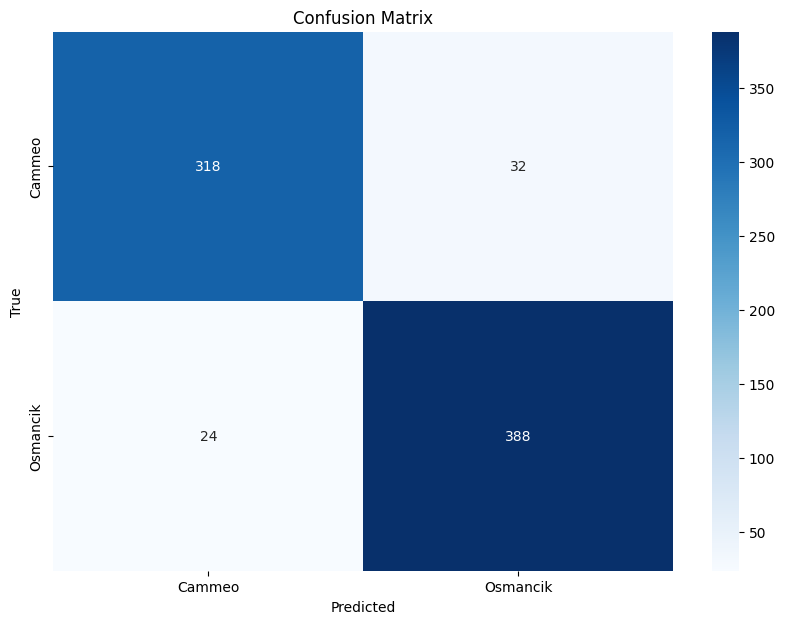

              precision    recall  f1-score     support
Cammeo         0.929825  0.908571  0.919075  350.000000
Osmancik       0.923810  0.941748  0.932692  412.000000
accuracy       0.926509  0.926509  0.926509    0.926509
macro avg      0.926817  0.925160  0.925884  762.000000
weighted avg   0.926572  0.926509  0.926438  762.000000
Accuracy: 0.926509186351706


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

# Split the data into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Cammeo', 'Osmancik'])
print(cm)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add label names
class_names = ['Cammeo', 'Osmancik']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

# Show the plot
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))